## **Estimación de depresión**

En este notebook se realiza el análisis de datos de salud mental con el objetivo de predecir si una persona tiene diagnosticada depresión o no.

Dataset disponible en: https://www.kaggle.com/competitions/playground-series-s4e11/overview

### **1. Importación de librerias y de los datos**

In [508]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV

In [346]:
# datos y conversion a dataframe
# datos de train
df = pd.read_csv('train.csv')
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [347]:
# datos y conversion a dataframe
# datos de test
df2 = pd.read_csv('test.csv')
df2.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

### **2. Exploración y limpieza de los datos**

En esta sección se realiza un análisis exploratorio del set de datos con el objetivo de comprenderlos. En el análisis se busca identificar datos faltantes, duplicados, outliers, inconsistencia en datos categóricos y se de ser necesario se aplican técnica de imputación para los datos faltantes y outliers.

In [348]:
# df
df.head(5).T

,0,1,2,3,4
id,0,1,2,3,4
Name,Aaradhya,Vivan,Yuvraj,Yuvraj,Rhea
Gender,Female,Male,Male,Male,Female
Age,49.0,26.0,33.0,22.0,30.0
City,Ludhiana,Varanasi,Visakhapatnam,Mumbai,Kanpur
Working Professional or Student,Working Professional,Working Professional,Student,Working Professional,Working Professional
Profession,Chef,Teacher,NaN,Teacher,Business Analyst
Academic Pressure,NaN,NaN,5.0,NaN,NaN
Work Pressure,5.0,4.0,NaN,5.0,1.0
CGPA,NaN,NaN,8.97,NaN,NaN


In [349]:
# tipo de datos
print("Tipos de datos del dataframe")
df.dtypes

Tipos de datos del dataframe


id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Los datos disponibles en el dataset son del tipo numérico, donde se visualizan datos del tipo "int" y "float", en particular, los datos númericos son: id, age, academic pressure, work pressure, cgpa, study satisfaction, job satisfaction, work/study hours, financial stress. Las demás variables son del tipo categórico y está identificadas como "object"

In [350]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [351]:
# df
df.shape

(140700, 20)

El dataset contiene 140700 filas y 20 columnas de datos.

In [352]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe().T

Estadistica descriptiva del dataset


,count,mean,std,min,25%,50%,75%,max
id,140700.0,70349.500000,40616.735775,0.00,35174.75,70349.50,105524.25,140699.0
Age,140700.0,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Academic Pressure,27897.0,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Work Pressure,112782.0,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
CGPA,27898.0,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Study Satisfaction,27897.0,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0
Job Satisfaction,112790.0,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Work/Study Hours,140700.0,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
Financial Stress,140696.0,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Depression,140700.0,0.181713,0.385609,0.00,0.00,0.00,0.00,1.0


A continuación, se buscan los valores duplicados en el dataset.

In [353]:
# duplicados
df.duplicated().sum()

0

El dataset no cuenta con valores duplicados.

A continuación, se procede a realizar una inspección de las variables del tipo "object" con el objetivo de encontrar y corregir inconsistencias en palabras. Para tal efecto, se define una función que extrae las columnas del tipo "object" de un dataset e imprime los valores únicos de cada columna.

In [354]:
# funcion que extrae valores unicos de columnas object
def valores_unicos(df):
    # extraer columnas object
    object_columns = df.select_dtypes(include=['object'])
    unique_values_dict = {}
    
    # identificar valores unicos
    for column in object_columns:
        unique_values = object_columns[column].unique()
        unique_values_dict[column] = unique_values
        # print(f"Columna '{column}': {unique_values}")
    return unique_values_dict

In [355]:
# mostrar valores unicos
valores_unicos(df)

{'Name': array(['Aaradhya', 'Vivan', 'Yuvraj', 'Rhea', 'Vani', 'Ritvik', 'Rajveer',
        'Aishwarya', 'Simran', 'Utkarsh', 'Aahana', 'Tejas', 'Aadhya',
        'Kiran', 'Aditi', 'Suhani', 'Jiya', 'Bhavesh', 'Armaan', 'Ishaani',
        'Prachi', 'Pratyush', 'Abhinav', 'Siddhesh', 'Aditya', 'Aarav',
        'Asha', 'Kashish', 'Prisha', 'Chhavi', 'Tanmay', 'Vihaan', 'Shiv',
        'Anvi', 'Darsh', 'Samar', 'Raunak', 'Mahi', 'Shaurya', 'Vidya',
        'Jai', 'Ayush', 'Ansh', 'Anand', 'Yashvi', 'Shrey', 'Ritika',
        'Mihir', 'Isha', 'Arjun', 'Rohan', 'Pratham', 'Nirvaan', 'Ishaan',
        'Aarya', 'Riya', 'Aariv', 'Raghavendra', 'Mahika', 'Abhishek',
        'Harshil', 'Janvi', 'Kartikeya', 'Shivam', 'Advait', 'Reyansh',
        'Saanvi', 'Ivaan', 'Pallavi', 'Sneha', 'Ayaan', 'Aakash', 'Raghav',
        'Satyam', 'Aarush', 'Vibha', 'Rupal', 'Sanya', 'Mira', 'Rashi',
        'Shlok', 'Harsha', 'Divya', 'Pranav', 'Hrithik', 'Tushar',
        'Garima', 'Zoya', 'Kian', 'Navya', 'Lak

Se logra identificar que se tienen muchos valores para las diferentes variables categoricas. En particular, las columnas de "sleep duration", "dietary habits" parecieran tener datos que no corresponden a esas columnas. 

A fin de evitar inconsistencias en la escritura de las palabras, se convierten todas a minusculas.

In [356]:
# extraer columnas categoricas
object_columns = df.select_dtypes(include=['object'])

# reemplazar por minusculas
for column in object_columns:
    df[column] = df[column].str.lower()

# resultado
df.head(5).T

,0,1,2,3,4
id,0,1,2,3,4
Name,aaradhya,vivan,yuvraj,yuvraj,rhea
Gender,female,male,male,male,female
Age,49.0,26.0,33.0,22.0,30.0
City,ludhiana,varanasi,visakhapatnam,mumbai,kanpur
Working Professional or Student,working professional,working professional,student,working professional,working professional
Profession,chef,teacher,NaN,teacher,business analyst
Academic Pressure,NaN,NaN,5.0,NaN,NaN
Work Pressure,5.0,4.0,NaN,5.0,1.0
CGPA,NaN,NaN,8.97,NaN,NaN


A continuación se explora los datos faltantes del dataset.

In [357]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Study Satisfaction,27897,112803,80.17
Academic Pressure,27897,112803,80.17
CGPA,27898,112802,80.17
Profession,104070,36630,26.03
Work Pressure,112782,27918,19.84
Job Satisfaction,112790,27910,19.84
Dietary Habits,140696,4,0.00
Family History of Mental Illness,140700,0,0.00
Financial Stress,140696,4,0.00
Work/Study Hours,140700,0,0.00


Hay datos faltantes en el datasety en mayor cantidad en las variables de study satisfaction, academic pressure, profession, work pressure y job satisfaction.

Seguidamente, se analiza la columna de sleep duration. Recordar que a pesasr de que esta columna no cuenta con datos faltantes, si contiene datos irregulares.

In [358]:
# unicos
df['Sleep Duration'].unique()

array(['more than 8 hours', 'less than 5 hours', '5-6 hours', '7-8 hours',
       'sleep_duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'no', '10-6 hours', 'than 5 hours',
       '49 hours', 'unhealthy', 'work_study_hours', '3-6 hours',
       '45-48 hours', '9-5', 'pune', '9-5 hours'], dtype=object)

In [359]:
# contar
df['Sleep Duration'].value_counts()

Sleep Duration
less than 5 hours    38784
7-8 hours            36969
more than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
no                       4
9-11 hours               2
10-11 hours              2
sleep_duration           2
unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
work_study_hours         1
49 hours                 1
than 5 hours             1
pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
indore                   1
1-3 hours                1
55-66 hours              1
moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

Se observa que hay datos que no corresponden a esta variable, como el sleep_duration, no, unhealthy, work_study_hours, pune, indore. También se observa que hay datos imposibles, como por ejemplo que la duración de horas de sueño sera de mas de 30 horas.

In [360]:
# describe
df['Sleep Duration'].describe()

count                140700
unique                   36
top       less than 5 hours
freq                  38784
Name: Sleep Duration, dtype: object

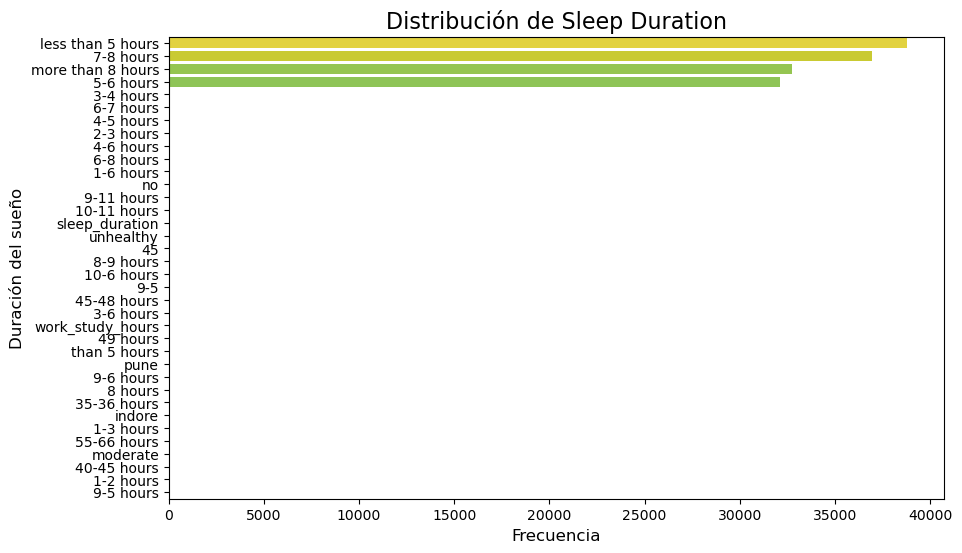

In [361]:
# distribucion 
sleep_data = df['Sleep Duration'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_data.values, y=sleep_data.index, palette="viridis", hue=sleep_data, legend=False)
plt.title('Distribución de Sleep Duration', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Duración del sueño', fontsize=12)
plt.show()

En el grafico se observa que los valores mas frecuentes son less than 5 hours, 7-8 hours, more than 8 hours y 5-6 hours. Tambien se identifica que hay datos fuera del rango para esta variable, asi como tambien datos que no pertencen a este grupo. 

A continuación se procede a inspeccionar más detenidamente los datos.

In [362]:
# funcion que filtra datos
def filtrar(df,columna,filtro):
    return df[df[columna] == filtro]

In [363]:
# filtrado
filtrar(df,'Sleep Duration','no')

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
66929,66929,damini,female,54.0,bhopal,working professional,doctor,NaN,3.0,NaN,NaN,1.0,no,healthy,mbbs,no,5.0,1.0,no,0
68239,68239,zegmay,male,46.0,bhopal,working professional,civil engineer,NaN,5.0,NaN,NaN,3.0,no,unhealthy,mca,no,3.0,1.0,yes,0
123519,123519,rohan,male,46.0,kolkata,working professional,data scientist,NaN,2.0,NaN,NaN,1.0,no,unhealthy,bsc,no,6.0,4.0,yes,0
132759,132759,vani,male,50.0,srinagar,working professional,teacher,NaN,4.0,NaN,NaN,4.0,no,unhealthy,llb,yes,2.0,3.0,no,0


In [364]:
# filtrado
filtrar(df,'Sleep Duration','sleep_duration')

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4021,4021,keshav,male,59.0,ghaziabad,working professional,judge,NaN,4.0,NaN,NaN,4.0,sleep_duration,healthy,llb,yes,10.0,1.0,no,0
35953,35953,aarav,male,34.0,thane,working professional,consultant,NaN,3.0,NaN,NaN,3.0,sleep_duration,moderate,mca,yes,9.0,3.0,yes,0


In [365]:
# filtrado
filtrar(df,'Sleep Duration','unhealthy')

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
79764,79764,kiran,female,35.0,jaipur,working professional,mechanical engineer,NaN,2.0,NaN,NaN,1.0,unhealthy,unhealthy,bsc,yes,6.0,2.0,no,0
94888,94888,tanya,female,53.0,varanasi,working professional,teacher,NaN,3.0,NaN,NaN,2.0,unhealthy,unhealthy,m.ed,yes,0.0,5.0,no,0


Al inspeccionar los datos en la columna sleep duration, algunos de ellos es evidente que se trata de un error en la recolección de los datos. Por tal motivo, se decide reemplazar esos datos por la moda de la columna. A la par, se toma la decisión de optimizar las clasificaciones, ya que hay categorias que no son necesarias. Por ejemplo, ya se cuenta con la categoria "more than 8 hours" y por lo tanto no es necesario otra categoria que especifique "10-12 hours", asi se optimizan las clasificaciones y se evita la redundancia.

In [366]:
# moda
moda_sleep_duration = df['Sleep Duration'].mode()[0]
print(moda_sleep_duration)

less than 5 hours


In [367]:
# lista de outliers
no_validos = [
    'sleep_duration', 'unhealthy', '45', '10-6 hours', '9-5', '45-48 hours',
    'work_study_hours', '49 hours', 'than 5 hours', 'pune', '9-6 hours',
    'indore', 'moderate', '40-45 hours','no','35-36 hours','9-5 hours','55-66 hours','40-45 hours']

# lista de validos 
validos_agrupados = [
    'less than 5 hours', '5-6 hours', '6-8 hours', 'more than 8 hours', '8 hours']

# reemplazar no validos
def clean_sleep_duration(dato):
    # si el dato no pertenece a la columna, se reemplaza por la moda
    if dato in no_validos:
        return moda_sleep_duration  
    if dato in ['1-2 hours', '1-3 hours','2-3 hours', '3-4 hours','4-5 hours']:
        return 'less than 5 hours'
    if dato in ['6-7 hours', '7-8 hours']:
        return '6-8 hours'
    if dato in ['9-11 hours', '10-11 hours','8-9 hours','8 hours']:
        return 'more than 8 hours'
    return dato  

# limpiar el dataset
df['Sleep Duration'] = df['Sleep Duration'].apply(clean_sleep_duration)

# unicos
df['Sleep Duration'].unique()

array(['more than 8 hours', 'less than 5 hours', '5-6 hours', '6-8 hours',
       '4-6 hours', '1-6 hours', '3-6 hours'], dtype=object)

In [368]:
# contar
df['Sleep Duration'].value_counts()

Sleep Duration
less than 5 hours    38834
6-8 hours            36981
more than 8 hours    32733
5-6 hours            32142
4-6 hours                5
1-6 hours                4
3-6 hours                1
Name: count, dtype: int64

Las categorias se generalizaron a "more than 8 hours", "less than 5 hours","6-8 hours" y "5-6 hours". Se observa que aun sobran clasificaciones que dificilmente entran en las clasificaciones nombradas. De 3-6 horas, se encuentra en el limite inferior y superior de las clases, asi como tambien 1-6 horas. Por esta razon, tambien se busca generalizar estas categorias.

In [369]:
# moda
moda_sleep_duration = df['Sleep Duration'].mode()[0]
print(moda_sleep_duration)

less than 5 hours


In [370]:
# reemplazar
df['Sleep Duration'] = df['Sleep Duration'].replace('1-6 hours', 'less than 5 hours')
df['Sleep Duration'] = df['Sleep Duration'].replace('3-6 hours', 'less than 5 hours')
df['Sleep Duration'] = df['Sleep Duration'].replace('4-6 hours', '5-6 hours')

# unicos
df['Sleep Duration'].unique()

array(['more than 8 hours', 'less than 5 hours', '5-6 hours', '6-8 hours'],
      dtype=object)

In [371]:
# moda
moda_sleep_duration = df['Sleep Duration'].mode()[0]
print(moda_sleep_duration)

less than 5 hours


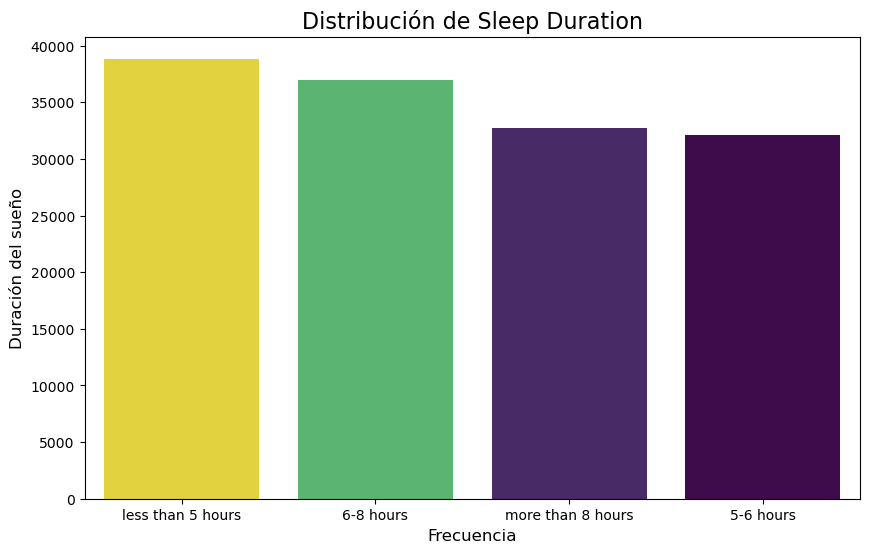

In [372]:
# distribucion 
sleep_data = df['Sleep Duration'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_data.index, y=sleep_data.values, palette="viridis", hue=sleep_data, legend=False)
plt.title('Distribución de Sleep Duration', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Duración del sueño', fontsize=12)
plt.show()

Según el gráfico de distribución de los datos, el valor con más frecuencia es "less than 5 hours", sin embargo, si se observa detenidamente, se logra identificar que 6-8hours y 5-6 hours en realidad engloban otra categoria: aquellas personas que duermente entre 5 y 8 horas, y la frecuencia de estos datos es mayor. 

Así, por ultimo, la clase de 5-6 hours y 6-8 horas puede redondearse a 5-8 hours.

In [373]:
# reemplazar
df['Sleep Duration'] = df['Sleep Duration'].replace(['5-6 hours', '6-8 hours'], '5-8 hours')

# unicos
df['Sleep Duration'].unique()

array(['more than 8 hours', 'less than 5 hours', '5-8 hours'],
      dtype=object)

Asi, la columna sleep duration se generalizo mas y quedo limpio.

In [374]:
# contar
df['Sleep Duration'].value_counts()

Sleep Duration
5-8 hours            69128
less than 5 hours    38839
more than 8 hours    32733
Name: count, dtype: int64

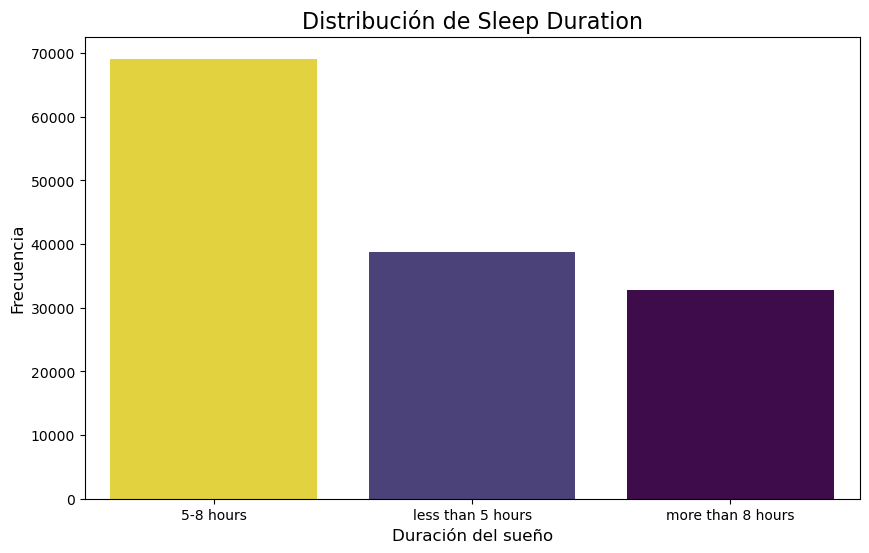

In [375]:
# distribucion 
sleep_data = df['Sleep Duration'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_data.index, y=sleep_data.values, palette="viridis", hue=sleep_data, legend=False)
plt.title('Distribución de Sleep Duration', fontsize=16)
plt.xlabel('Duración del sueño', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Efectivamente, la cantidad de gente que duerme entre 5 y 8 horas es más frecuente que aquellas que duermen menos de 5 horas, y aquellas que duermen mas de 8 horas son mucho menos frecuente.

Otra de las columnas con datos inconsistentes para su naturaleza es de la dietary habit.

In [376]:
# unicos
df['Dietary Habits'].unique()

array(['healthy', 'unhealthy', 'moderate', 'yes', 'pratham', 'bsc',
       'gender', '3', 'more healthy', 'less than healthy', 'mihir', '1.0',
       'hormonal', 'electrician', nan, 'no healthy', 'less healthy',
       'm.tech', 'vegas', 'no', 'male', 'indoor', 'class 12', '2'],
      dtype=object)

Evidentemente, estos datos se encuentran de manera incorrecta y serán corregidos a continuación.

In [377]:
# contar
df['Dietary Habits'].value_counts()

Dietary Habits
moderate             49705
unhealthy            46227
healthy              44741
yes                      2
no                       2
more healthy             2
no healthy               1
class 12                 1
indoor                   1
male                     1
vegas                    1
m.tech                   1
less healthy             1
1.0                      1
electrician              1
hormonal                 1
mihir                    1
less than healthy        1
3                        1
gender                   1
bsc                      1
pratham                  1
2                        1
Name: count, dtype: int64

Las categorias principales son: moderate, unhealthy y healthy.

In [378]:
# moda
mode_diet = df['Dietary Habits'].mode()[0]
print(mode_diet)

moderate


Se reemplazan los datos erroneos y faltantes con la moda. 

In [379]:
# valores validos
valid_values = ['moderate', 'unhealthy', 'healthy']

# reemplazar
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: mode_diet if x not in valid_values else x)

# unicos
print(df['Dietary Habits'].unique())

['healthy' 'unhealthy' 'moderate']


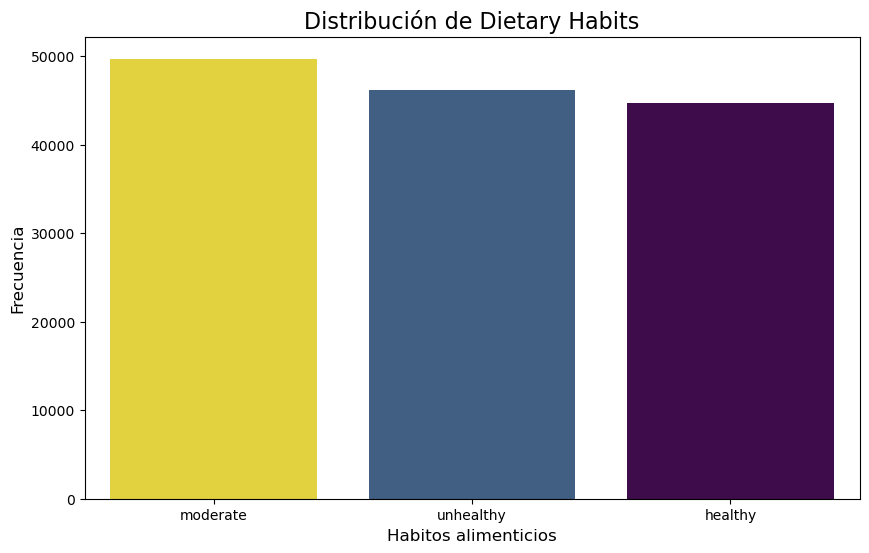

In [380]:
# dist
diet_data = df['Dietary Habits'].value_counts()

# barras
plt.figure(figsize=(10, 6))
sns.barplot(x=diet_data.index, y=diet_data.values, palette="viridis", hue=diet_data, legend=False)
plt.title('Distribución de Dietary Habits', fontsize=16)
plt.xlabel('Habitos alimenticios', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Se observa una alta cantidad de personas con habitos alimentiicios moderados y unhealthy, mientras que en un ultimo lugar se posicionan las personas con habitos saludables.

In [381]:
# columnas
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

A continuacion se eliminan las columnas que no aportaran valor predictivo al modelo de momento: nombre, id

In [382]:
# eliminar columnas
df = df.drop(columns=['id', 'Name'])

# df
df.head(5).T

,0,1,2,3,4
Gender,female,male,male,male,female
Age,49.0,26.0,33.0,22.0,30.0
City,ludhiana,varanasi,visakhapatnam,mumbai,kanpur
Working Professional or Student,working professional,working professional,student,working professional,working professional
Profession,chef,teacher,NaN,teacher,business analyst
Academic Pressure,NaN,NaN,5.0,NaN,NaN
Work Pressure,5.0,4.0,NaN,5.0,1.0
CGPA,NaN,NaN,8.97,NaN,NaN
Study Satisfaction,NaN,NaN,2.0,NaN,NaN
Job Satisfaction,2.0,3.0,NaN,1.0,1.0


A continuacion se explora la variable de gender.

In [383]:
# unicos
df['Gender'].unique()

array(['female', 'male'], dtype=object)

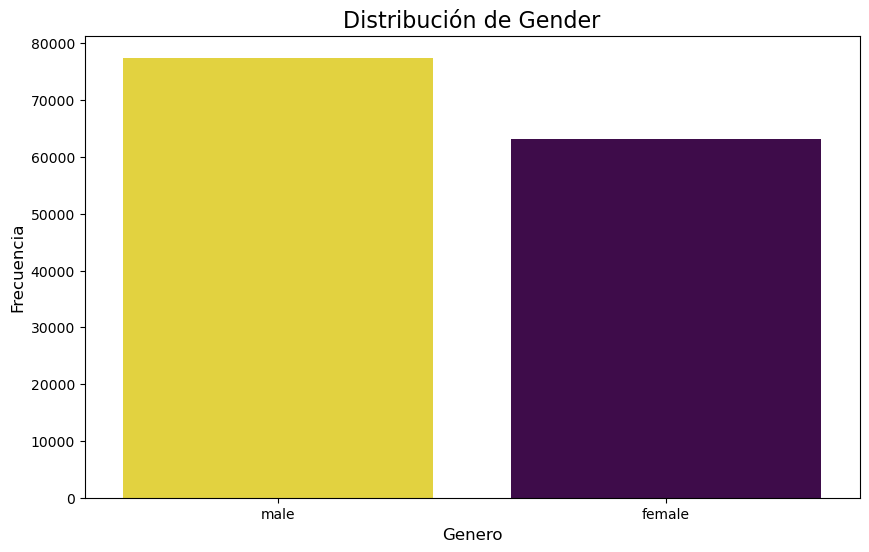

In [384]:
# dist
gender_data = df['Gender'].value_counts()

# barras
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_data.index, y=gender_data.values, palette="viridis", hue=gender_data, legend=False)
plt.title('Distribución de Gender', fontsize=16)
plt.xlabel('Genero', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

En el dataframe hay mas cantidad de datos de personas del genero masculino que del femenino.

Se procede a analizar la columna city

In [385]:
# unicos
df['City'].unique()

array(['ludhiana', 'varanasi', 'visakhapatnam', 'mumbai', 'kanpur',
       'ahmedabad', 'thane', 'nashik', 'bangalore', 'patna', 'rajkot',
       'jaipur', 'pune', 'lucknow', 'meerut', 'agra', 'surat',
       'faridabad', 'hyderabad', 'srinagar', 'ghaziabad', 'kolkata',
       'chennai', 'kalyan', 'nagpur', 'vadodara', 'vasai-virar', 'delhi',
       'bhopal', 'indore', 'ishanabad', 'vidhi', 'ayush', 'gurgaon',
       'krishna', 'aishwarya', 'keshav', 'harsha', 'nalini', 'aditya',
       'malyansh', 'raghavendra', 'saanvi', 'm.tech', 'bhavna',
       'less delhi', 'nandini', 'm.com', 'plata', 'atharv', 'pratyush',
       'city', '3.0', 'less than 5 kalyan', 'mca', 'mira', 'moreadhyay',
       'morena', 'ishkarsh', 'kashk', 'mihir', 'vidya', 'tolkata', 'anvi',
       'krinda', 'ayansh', 'shrey', 'ivaan', 'vaanya', 'gaurav', 'harsh',
       'reyansh', 'kashish', 'kibara', 'vaishnavi', 'chhavi', 'parth',
       'mahi', 'tushar', 'msc', 'no', 'rashi', 'me', 'molkata',
       'researcher', '

Tambien en la columna ciudad se visualiza que hay datos que no corresponde al nombre de ciudades.

In [386]:
# moda
df['City'].mode()[0]

'kalyan'

Para corregir la columna de city, se utilizara la moda, que es este caso es Kalyan.

In [387]:
# no validas
invalid_values = ['yes', 'no', 'more healthy', 'no healthy', 'class 12', 'indoor', 'male', 'vegas', 'm.tech', 
                'less healthy', '1.0', 'electrician', 'hormonal', 'mihir', 'vidhi', 'ayush', 'gurgaon', 'krishna', 
                'aishwarya', 'keshav', 'harsha', 'nalini', 'aditya', 'malyansh', 'raghavendra', 'saanvi', 'm.com', 
                'plata', 'atharv', 'pratyush', 'city', '3.0', 'less delhi', 'nandini', 'mira', 'moreadhyay', 'morena', 
                'ishkarsh', 'kashk', 'mihir', 'vidya', 'tolkata', 'anvi', 'krinda', 'ayansh', 'shrey', 'ivaan', 'vaanya', 
                'gaurav', 'harsh', 'reyansh', 'kashish', 'kibara', 'vaishnavi', 'chhavi', 'parth', 'mahi', 'tushar', 
                'msc', 'no', 'rashi', 'me', 'molkata', 'researcher', 'kagan', 'armaan', 'ithal', 'nalyan', 'dhruv', 
                'galesabad', 'itheg', 'aaradhya', 'pooja', 'khushi', 'khaziabad', 'jhanvi', 'unirar']

# validos
valid_cities = ['ludhiana', 'varanasi', 'visakhapatnam', 'mumbai', 'kanpur', 'ahmedabad', 'thane', 'nashik', 
                'bangalore', 'patna', 'rajkot', 'jaipur', 'pune', 'lucknow', 'meerut', 'agra', 'surat', 'faridabad', 
                'hyderabad', 'srinagar', 'ghaziabad', 'kolkata', 'chennai', 'kalyan', 'nagpur', 'vadodara', 'vasai-virar', 
                'delhi', 'bhopal', 'indore']

# reemplazar con la moda
df['City'] = df['City'].apply(lambda x: x if x in valid_cities else 'kalyan')

# unicos
df['City'].unique()

# count
df['City'].value_counts()

City
kalyan           6689
patna            5924
vasai-virar      5765
kolkata          5689
ahmedabad        5613
meerut           5528
ludhiana         5226
pune             5210
rajkot           5207
visakhapatnam    5176
srinagar         5074
mumbai           4966
indore           4872
agra             4684
surat            4636
varanasi         4606
vadodara         4568
hyderabad        4496
kanpur           4398
jaipur           4328
thane            4289
lucknow          4280
nagpur           4209
bangalore        4123
chennai          4044
ghaziabad        3620
delhi            3593
bhopal           3475
faridabad        3268
nashik           3144
Name: count, dtype: int64

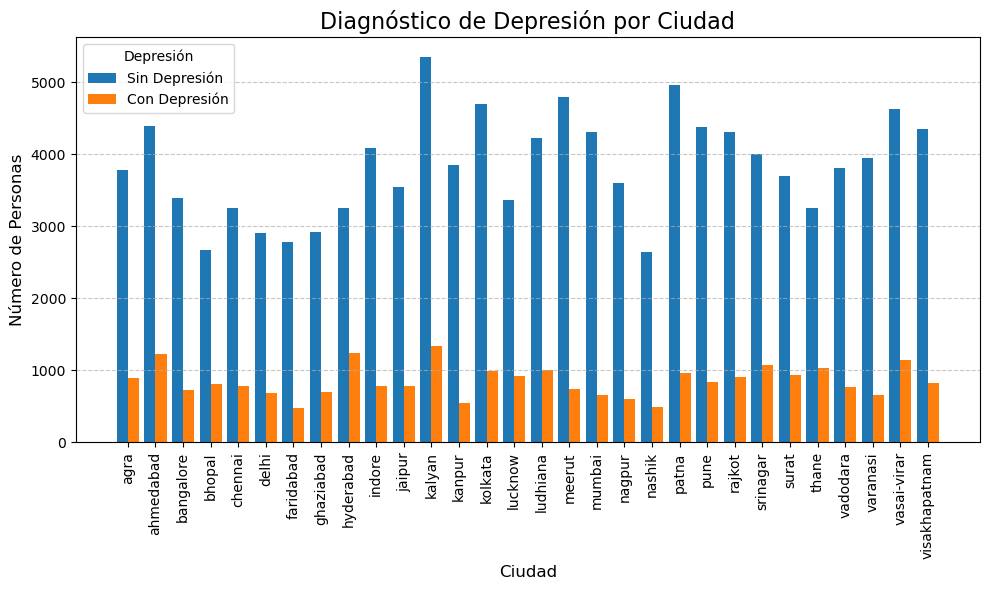

In [ ]:
# agrupar por ciudad y depresion
city_depression = df.groupby(['City', 'Depression']).size().unstack(fill_value=0)

# barras agrupadas
x = np.arange(len(city_depression)) 
width = 0.4 

# grafico
fig, ax = plt.subplots(figsize=(10, 6))

# barras para cada diagnóstico
bars1 = ax.bar(x - width/2, city_depression[0], width, label='Sin Depresión', color='#1f77b4')
bars2 = ax.bar(x + width/2, city_depression[1], width, label='Con Depresión', color='#ff7f0e')
ax.set_title('Diagnóstico de Depresión por Ciudad', fontsize=16)
ax.set_xlabel('Ciudad', fontsize=12)
ax.set_ylabel('Número de Personas', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(city_depression.index, rotation=90, fontsize=10)
ax.legend(title='Depresión')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# grafico
plt.tight_layout()
plt.show()

Se observa la distribución del diagnostico de depresion por ciudad. En general, hay menos personas con el diagnostico, pero las ciudades de hyderabad y kaylan son las que mas diagnostico positivo tienen.

Se procede a analizar la variable columna "working professional or student"

In [394]:
# unicos
df['Working Professional or Student'].unique()

array(['working professional', 'student'], dtype=object)

Solo contiene dos tipos de variables, que parecen ser correctas.

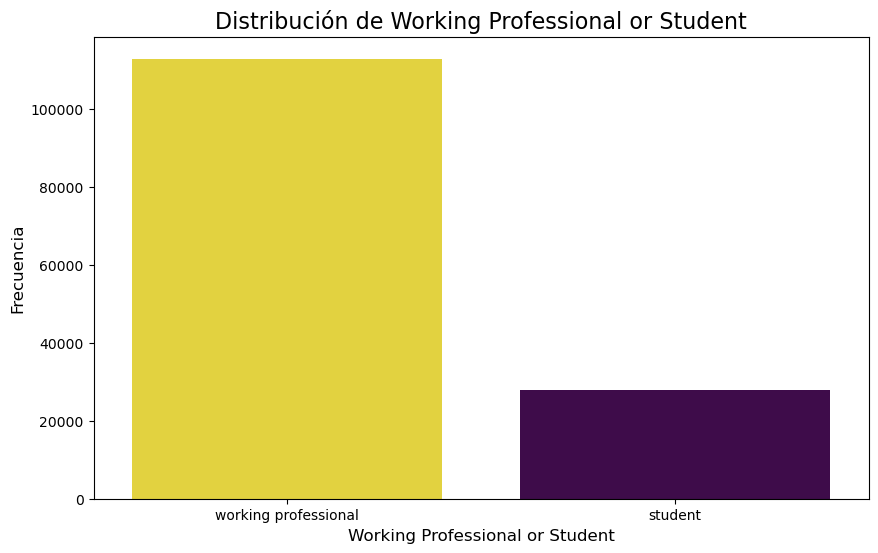

In [395]:
# dist
workstudent_data = df['Working Professional or Student'].value_counts()

# barras
plt.figure(figsize=(10, 6))
sns.barplot(x=workstudent_data.index, y=workstudent_data.values, palette="viridis", hue=workstudent_data, legend=False)
plt.title('Distribución de Working Professional or Student', fontsize=16)
plt.xlabel('Working Professional or Student', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

En el dataset se encuentran mas personas que son trabajadoras antes que estudiantes.

Se procede a analizar la variable study satisfaction.

In [396]:
# unicos
df['Study Satisfaction'].unique()

array([nan,  2.,  5.,  3.,  4.,  1.])

Se trata de valores del tipo float y tienen el 80% de datos faltantes. Es una escala del 1 al 5 que caracteriza la satisfaccion de la persona en cuanto a sus estudios. Al ser una variable numerica, se analiza su distribucion y sus estadisticas para elegir el metodo de imputacion correspondiente.

In [397]:
# estadisticas
df['Study Satisfaction'].describe()

count    27897.000000
mean         2.944940
std          1.360197
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study Satisfaction, dtype: float64

Se rellenan los datos faltantes con la media.

In [398]:
# rellenar con la mediana
mean = df['Study Satisfaction'].mean()
df['Study Satisfaction'] = df['Study Satisfaction'].fillna(mean)

# unicos
df['Study Satisfaction'].value_counts()

Study Satisfaction
2.94494    112803
4.00000      6360
2.00000      5840
3.00000      5823
1.00000      5451
5.00000      4423
Name: count, dtype: int64

A continucion se analiza la columna academic pressure.

In [399]:
# unicos
df['Academic Pressure'].unique()

array([nan,  5.,  2.,  3.,  4.,  1.])

Nuevamente se trata de una escala del 1 al 5 de la presion academica de la persona.

In [400]:
# contar
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7463
5.0    6296
4.0    5158
1.0    4801
2.0    4179
Name: count, dtype: int64

In [401]:
# describe
df['Academic Pressure'].describe()

count    27897.000000
mean         3.142273
std          1.380457
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Academic Pressure, dtype: float64

In [402]:
# rellenar con la media
mean = df['Academic Pressure'].mean()
df['Academic Pressure'] = df['Academic Pressure'].fillna(mean)

# unicos
df['Academic Pressure'].describe()

count    140700.000000
mean          3.142273
std           0.614679
min           1.000000
25%           3.142273
50%           3.142273
75%           3.142273
max           5.000000
Name: Academic Pressure, dtype: float64

Se procede a analizar la columna CGPA

In [403]:
# unicos
df['CGPA'].unique()

array([    nan,  8.97  ,  5.9   ,  7.03  ,  5.59  ,  8.13  ,  5.7   ,
        9.54  ,  8.04  ,  9.79  ,  8.38  ,  6.1   ,  7.04  ,  8.52  ,
        5.64  ,  8.58  ,  6.51  ,  7.25  ,  7.83  ,  9.93  ,  8.74  ,
        6.73  ,  5.57  ,  8.59  ,  7.1   ,  6.08  ,  5.74  ,  9.86  ,
        6.7   ,  6.21  ,  5.87  ,  6.37  ,  9.72  ,  5.88  ,  9.56  ,
        6.99  ,  5.24  ,  9.21  ,  7.85  ,  6.95  ,  5.86  ,  7.92  ,
        9.66  ,  8.94  ,  9.71  ,  7.87  ,  5.6   ,  7.9   ,  5.46  ,
        6.79  ,  8.7   ,  7.38  ,  8.5   ,  7.09  ,  9.82  ,  8.89  ,
        7.94  ,  9.11  ,  6.75  ,  7.53  ,  9.49  ,  9.01  ,  7.64  ,
        5.27  ,  6.    ,  9.44  ,  5.75  ,  7.51  ,  9.05  ,  6.38  ,
        8.95  ,  9.88  ,  5.32  ,  6.27  ,  7.7   ,  8.1   ,  9.59  ,
        8.96  ,  5.51  ,  7.43  ,  8.79  ,  9.95  ,  5.37  ,  6.86  ,
        8.32  ,  9.74  ,  5.66  ,  7.48  ,  8.23  ,  8.81  ,  6.03  ,
        5.56  ,  5.68  ,  5.14  ,  7.61  ,  6.17  ,  8.17  ,  9.87  ,
        8.75  ,  6.1

In [404]:
# describe
df['CGPA'].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

Se rellena los datos faltantes con la media

In [405]:
# rellenar con la media
mean = df['CGPA'].mean()
df['CGPA'] = df['CGPA'].fillna(mean)

# unicos
df['CGPA'].describe()

count    140700.000000
mean          7.658636
std           0.652098
min           5.030000
25%           7.658636
50%           7.658636
75%           7.658636
max          10.000000
Name: CGPA, dtype: float64

Se analiza la columna profession

In [406]:
# unicos
df['Profession'].unique()

array(['chef', 'teacher', nan, 'business analyst', 'finanancial analyst',
       'chemist', 'electrician', 'software engineer', 'data scientist',
       'plumber', 'marketing manager', 'accountant', 'entrepreneur',
       'hr manager', 'ux/ui designer', 'content writer',
       'educational consultant', 'civil engineer', 'manager',
       'pharmacist', 'financial analyst', 'architect',
       'mechanical engineer', 'customer support', 'consultant', 'judge',
       'researcher', 'pilot', 'graphic designer', 'travel consultant',
       'digital marketer', 'lawyer', 'research analyst',
       'sales executive', 'doctor', 'unemployed', 'investment banker',
       'family consultant', 'b.com', 'be', 'student', 'yogesh', 'dev',
       'mba', 'llm', 'bca', 'academic', 'profession', 'familyvirar',
       'city manager', 'bba', 'medical doctor', 'working professional',
       'mbbs', 'patna', 'unveil', 'b.ed', 'nagpur', 'moderate', 'm.ed',
       'analyst', 'pranav', 'visakhapatnam', 'phd', 'yu

In [407]:
# profesiones
valid_professions = [
    'chef', 'teacher', 'business analyst', 'financial analyst', 'chemist', 'electrician', 'software engineer', 
    'data scientist', 'plumber', 'marketing manager', 'accountant', 'entrepreneur', 'hr manager', 'ux/ui designer', 
    'content writer', 'educational consultant', 'civil engineer', 'manager', 'pharmacist', 'architect', 
    'mechanical engineer', 'customer support', 'consultant', 'judge', 'researcher', 'pilot', 'graphic designer', 
    'travel consultant', 'digital marketer', 'lawyer', 'research analyst', 'sales executive', 'doctor', 
    'investment banker', 'family consultant', 'working professional', 'medical doctor', 'analyst', 'phd'
]

# no válidas por 'other'
df['Profession'] = df['Profession'].apply(lambda x: x if x in valid_professions else 'other')

# unicos
df['Profession'].unique()

array(['chef', 'teacher', 'other', 'business analyst', 'chemist',
       'electrician', 'software engineer', 'data scientist', 'plumber',
       'marketing manager', 'accountant', 'entrepreneur', 'hr manager',
       'ux/ui designer', 'content writer', 'educational consultant',
       'civil engineer', 'manager', 'pharmacist', 'financial analyst',
       'architect', 'mechanical engineer', 'customer support',
       'consultant', 'judge', 'researcher', 'pilot', 'graphic designer',
       'travel consultant', 'digital marketer', 'lawyer',
       'research analyst', 'sales executive', 'doctor',
       'investment banker', 'family consultant', 'medical doctor',
       'working professional', 'analyst', 'phd'], dtype=object)

In [408]:
# contar
df['Profession'].value_counts()

Profession
other                     38003
teacher                   24906
content writer             7814
architect                  4370
consultant                 4229
hr manager                 4022
pharmacist                 3893
doctor                     3255
business analyst           3161
entrepreneur               2968
chemist                    2967
chef                       2862
educational consultant     2852
data scientist             2390
researcher                 2328
lawyer                     2212
customer support           2055
marketing manager          1976
pilot                      1913
travel consultant          1860
plumber                    1748
sales executive            1739
manager                    1737
judge                      1712
electrician                1582
financial analyst          1574
software engineer          1510
civil engineer             1470
ux/ui designer             1452
digital marketer           1372
accountant                 13

Se analiza degree

In [409]:
# unicos 
df['Degree'].unique()

array(['bhm', 'llb', 'b.pharm', 'bba', 'mca', 'md', 'bsc', 'me', 'b.arch',
       'bca', 'be', 'ma', 'b.ed', 'b.com', 'mba', 'm.com', 'mhm', 'ba',
       'class 12', 'm.tech', 'phd', 'm.ed', 'msc', 'b.tech', 'llm',
       'mbbs', 'm.pharm', 'ux/ui designer', 'mpa', 'bh', 'nalini', 'bed',
       'b.sc', 'veda', 'bhopal', 's.tech', 'degree', '20', 'class 11',
       'h_pharm', 'm', 'p.com', 'bpharm', 'business analyst', 'm.arch',
       'll.com', 'data scientist', 'mpharm', 'l.ed', 'p.pharm', 'kalyan',
       'unite', 'barch', 'hr manager', 'badhya', 's.pharm', 'llba',
       'vrinda', 'm. business analyst', 'bhavesh', '0', 'llcom', '29',
       'mtech', 'vivaan', 'bpa', 'plumber', '5.61', 'brit', 'b.03',
       'ritik', '5.56', 'med', 'b', 'b ba', '7.06', 'b.b.arch', 'aca',
       'brithika', 'cgpa', '24', 'm_tech', 'pihu', 'bb', 'jhanvi',
       'lltech', 'aarav', 'entrepreneur', '8.56', 'lhm', 'lata', 's.arch',
       'marsh', 'hca', '5.88', 'b.student', 'll b.ed', 'm.s', 'navya',
   

En los datos de degree tambien se observa que datos que no corresponden a la columna, y por tanto se debe corregir.

In [411]:
# corregir columna degree
degree_mapping = {
    'b.arch': 'bachelor', 'b. arch': 'bachelor', 'btech': 'bachelor', 'b. tech': 'bachelor',
    'bsc': 'bachelor', 'b.sc': 'bachelor', 'bba': 'bachelor', 'bca': 'bachelor',
    'be': 'bachelor', 'b.ed': 'bachelor', 'class 12': 'other', 'class 11': 'other',
    'ma': 'master', 'msc': 'master', 'mca': 'master', 'mba': 'master', 'm.tech': 'master',
    'm. tech': 'master', 'md': 'doctor', 'mbbs': 'doctor', 'phd': 'doctor',
    'm.pharm': 'master', 'llb': 'other', 'llm': 'other', 'ux/ui designer': 'other',
    'data scientist': 'other', 'business analyst': 'other', 'hr manager': 'other',
    'doctor': 'doctor', 'n.pharm': 'other', 'rca': 'other', 'degree': 'other',
    'other': 'other', 'bpharm': 'bachelor', 'pharm': 'bachelor', 'plumber': 'other',
    'teacher': 'other', 'entrepreneur': 'other', 'lawyer': 'other', 'judge': 'other',
    'researcher': 'other', 'pilot': 'other', 'electrician': 'other', 'mechanical engineer': 'other',
    'architect': 'other', 'manager': 'other', 'pharmacist': 'other', 'consultant': 'other',
    'customer support': 'other', 'academic': 'other', 'student': 'other', 'unemployed': 'other',
    'working professional': 'other', 'b.com': 'bachelor', 'bba': 'bachelor', 'bsc': 'bachelor',
    'mcom': 'master', 'm.tech': 'master', 'medical doctor': 'doctor', 'mca': 'master',
    'm.ed': 'master', 'mpharm': 'master', 'bpa': 'bachelor', 'm.s': 'master', 'mba': 'master'
}

# mapeo
df['Degree'] = df['Degree'].map(degree_mapping).fillna('other')

# resultados
df['Degree'].unique()

array(['other', 'bachelor', 'master', 'doctor'], dtype=object)

In [412]:
# filtrar 
df[df['Profession'] == 'other'][['Profession', 'Degree']]

,Profession,Degree
2,other,other
5,other,master
8,other,bachelor
26,other,other
29,other,other
...,...,...
140686,other,master
140689,other,doctor
140690,other,other
140695,other,other


Se analiza la columna de job satisfaction

In [414]:
# unicos
df['Job Satisfaction'].unique()

array([ 2.,  3., nan,  1.,  5.,  4.])

Nuevamente se trata de una escala con valores de satisfaccion.

In [415]:
# describe
df['Job Satisfaction'].describe()

count    112790.000000
mean          2.974404
std           1.416078
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

Se rellena los faltantes con la media.

In [416]:
# rellenar con la media
mean = df['Job Satisfaction'].mean()
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(mean)

# unicos
df['Job Satisfaction'].describe()

count    140700.000000
mean          2.974404
std           1.267871
min           1.000000
25%           2.000000
50%           2.974404
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

Se analiza la columna work pressure

In [417]:
# unicos
df['Work Pressure'].unique()

array([ 5.,  4., nan,  1.,  2.,  3.])

Tambien se trata de una escala y se rellena con la media.

In [418]:
# describe
df['Work Pressure'].describe()

count    112782.000000
mean          2.998998
std           1.405771
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work Pressure, dtype: float64

In [419]:
# rellenar con la media
mean = df['Work Pressure'].mean()
df['Work Pressure'] = df['Work Pressure'].fillna(mean)

# unicos
df['Work Pressure'].describe()

count    140700.000000
mean          2.998998
std           1.258598
min           1.000000
25%           2.000000
50%           2.998998
75%           4.000000
max           5.000000
Name: Work Pressure, dtype: float64

Se analiza la columna de Family History of Mental Illness	

In [420]:
# unicos
df['Family History of Mental Illness'].unique()

array(['no', 'yes'], dtype=object)

In [421]:
# contar
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
no     70758
yes    69942
Name: count, dtype: int64

Se analiza la columna de Financial Stress

In [422]:
# unicos
df['Financial Stress'].unique()

array([ 2.,  3.,  1.,  4.,  5., nan])

Se trata de una escala y se rellena con la media.

In [423]:
# rellenar con la media
mean = df['Financial Stress'].mean()
df['Financial Stress'] = df['Financial Stress'].fillna(mean)

# unicos
df['Financial Stress'].describe()

count    140700.000000
mean          2.988983
std           1.413613
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Financial Stress, dtype: float64

Se analiza la columna work/study hours

In [424]:
# unicos
df['Work/Study Hours'].unique()

array([ 1.,  7.,  3., 10.,  9.,  6.,  8.,  2.,  0.,  5., 12.,  4., 11.])

Se analiza la columna de suicidal thoughts

In [425]:
# unicos
df['Have you ever had suicidal thoughts ?'].unique()

array(['no', 'yes'], dtype=object)

In [426]:
# contar
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
no     71138
yes    69562
Name: count, dtype: int64

In [428]:
# depression
df['Depression'].unique()

array([0, 1], dtype=int64)

In [429]:
# contar
df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

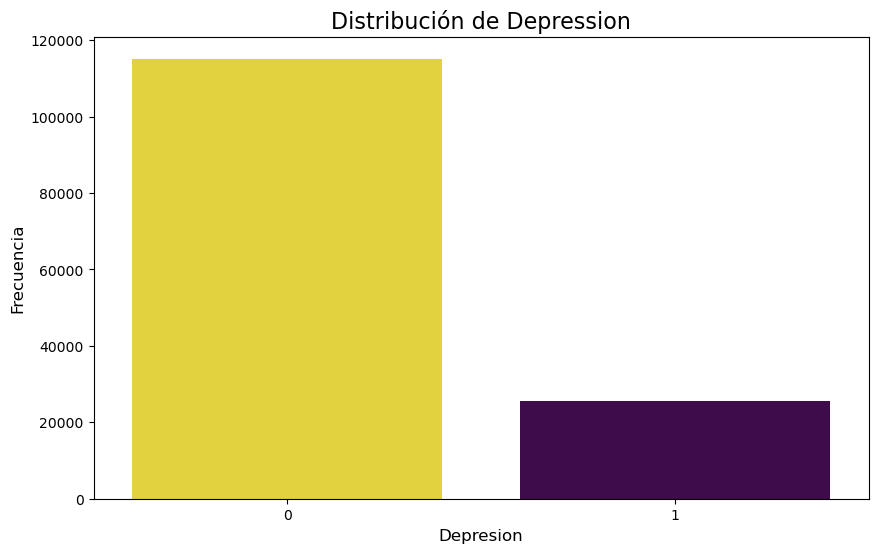

In [430]:
# dist
depression_data = df['Depression'].value_counts()

# barras
plt.figure(figsize=(10, 6))
sns.barplot(x=depression_data.index, y=depression_data.values, palette="viridis", hue=depression_data, legend=False)
plt.title('Distribución de Depression', fontsize=16)
plt.xlabel('Depresion', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

La cantidad de personas con diagnostido de depresion es menor a las que no lo tienen diagnosticado.

Se verifica si los datos faltantes fueron rellenados.

In [431]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Gender,140700,0,0.0
Age,140700,0,0.0
Family History of Mental Illness,140700,0,0.0
Financial Stress,140700,0,0.0
Work/Study Hours,140700,0,0.0
Have you ever had suicidal thoughts ?,140700,0,0.0
Degree,140700,0,0.0
Dietary Habits,140700,0,0.0
Sleep Duration,140700,0,0.0
Job Satisfaction,140700,0,0.0


El dataset quedo con los datos rellenados.

Se procede a visualizar la distribución de los datos.

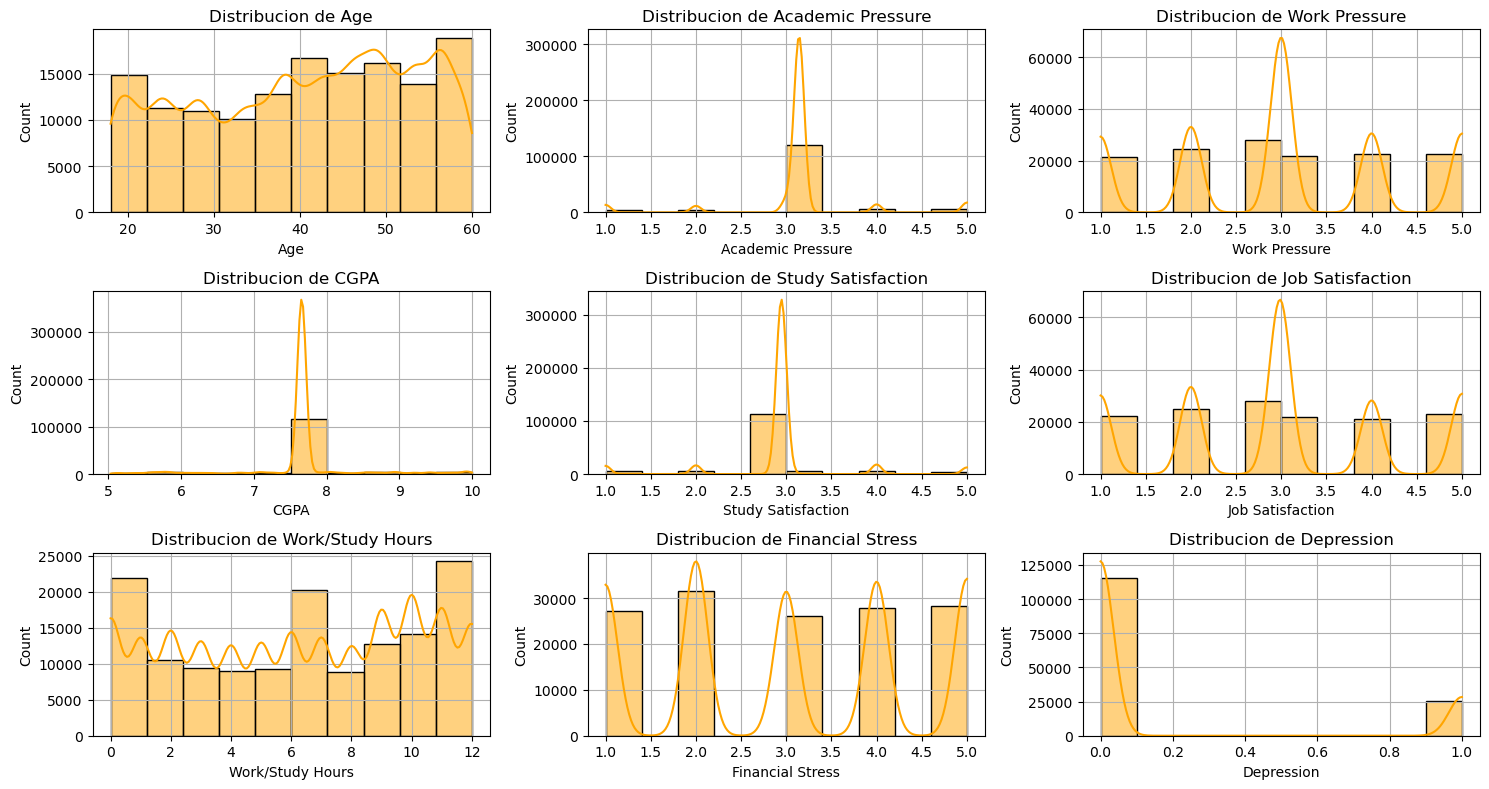

In [432]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="orange", bins=10)  
    plt.title(f"Distribucion de {col}")
    plt.tight_layout()
    plt.grid()

plt.show()

A continuación, se procede a visualizar outliers en los datos.

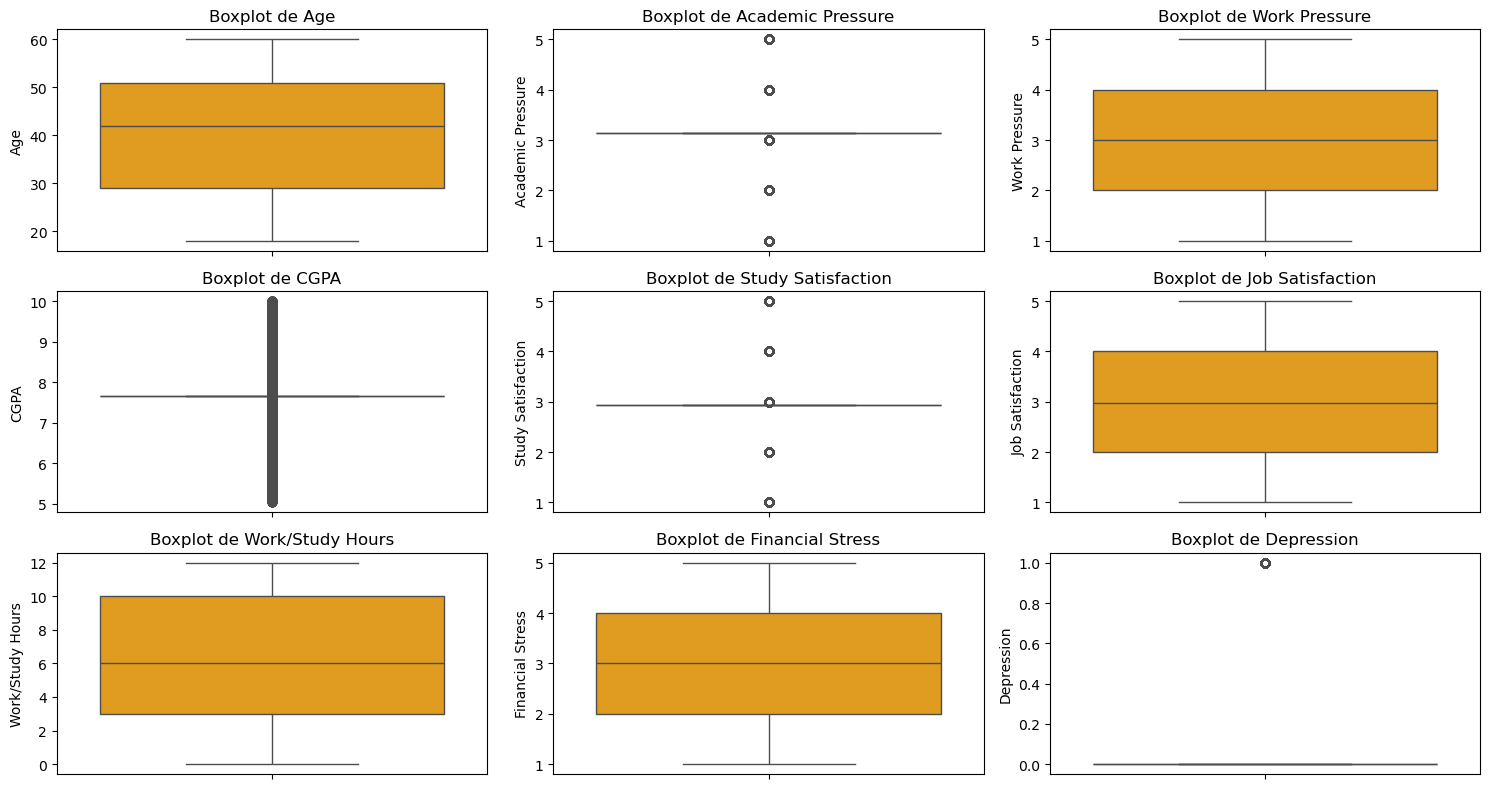

In [433]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logra visualizar que outliers solo algunas columnas, en particula en CGPA.

In [434]:
# unicos
df['CGPA'].unique()

array([ 7.65863619,  8.97      ,  5.9       ,  7.03      ,  5.59      ,
        8.13      ,  5.7       ,  9.54      ,  8.04      ,  9.79      ,
        8.38      ,  6.1       ,  7.04      ,  8.52      ,  5.64      ,
        8.58      ,  6.51      ,  7.25      ,  7.83      ,  9.93      ,
        8.74      ,  6.73      ,  5.57      ,  8.59      ,  7.1       ,
        6.08      ,  5.74      ,  9.86      ,  6.7       ,  6.21      ,
        5.87      ,  6.37      ,  9.72      ,  5.88      ,  9.56      ,
        6.99      ,  5.24      ,  9.21      ,  7.85      ,  6.95      ,
        5.86      ,  7.92      ,  9.66      ,  8.94      ,  9.71      ,
        7.87      ,  5.6       ,  7.9       ,  5.46      ,  6.79      ,
        8.7       ,  7.38      ,  8.5       ,  7.09      ,  9.82      ,
        8.89      ,  7.94      ,  9.11      ,  6.75      ,  7.53      ,
        9.49      ,  9.01      ,  7.64      ,  5.27      ,  6.        ,
        9.44      ,  5.75      ,  7.51      ,  9.05      ,  6.38

In [435]:
# describe
df['CGPA'].describe()

count    140700.000000
mean          7.658636
std           0.652098
min           5.030000
25%           7.658636
50%           7.658636
75%           7.658636
max          10.000000
Name: CGPA, dtype: float64

In [436]:
# contar
df['CGPA'].value_counts()

CGPA
7.658636    112802
8.040000       822
9.960000       425
5.740000       410
8.950000       371
             ...  
6.640000         1
7.062500         1
6.980000         1
6.440000         1
6.090000         1
Name: count, Length: 332, dtype: int64

Con el objetivo de ir analizando los outliers de las variables se define la funcion identificar_ouliers.

In [437]:
# funcion para identificar outliers
def identificar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # filtrar 
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    
    return {
        'outliers': outliers,
        'limites': {'inferior': lower_bound, 'superior': upper_bound}}

In [438]:
# idenficar outliers de pregnancies
identificar_outliers(df,'CGPA')

{'outliers':         Gender   Age           City Working Professional or Student  \
 2         male  33.0  visakhapatnam                         student   
 8       female  24.0      bangalore                         student   
 26        male  31.0       srinagar                         student   
 30      female  28.0       varanasi                         student   
 32      female  25.0         jaipur                         student   
 ...        ...   ...            ...                             ...   
 140685  female  27.0          surat                         student   
 140686    male  27.0       ludhiana                         student   
 140689    male  31.0      faridabad                         student   
 140690  female  18.0       ludhiana                         student   
 140699    male  27.0          patna                         student   
 
        Profession  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
 2           other                5.0   

Nuevamente se procede a verificar los datos unicos del dataset.

In [439]:
# unicos
valores_unicos(df)

{'Gender': array(['female', 'male'], dtype=object),
 'City': array(['ludhiana', 'varanasi', 'visakhapatnam', 'mumbai', 'kanpur',
        'ahmedabad', 'thane', 'nashik', 'bangalore', 'patna', 'rajkot',
        'jaipur', 'pune', 'lucknow', 'meerut', 'agra', 'surat',
        'faridabad', 'hyderabad', 'srinagar', 'ghaziabad', 'kolkata',
        'chennai', 'kalyan', 'nagpur', 'vadodara', 'vasai-virar', 'delhi',
        'bhopal', 'indore'], dtype=object),
 'Working Professional or Student': array(['working professional', 'student'], dtype=object),
 'Profession': array(['chef', 'teacher', 'other', 'business analyst', 'chemist',
        'electrician', 'software engineer', 'data scientist', 'plumber',
        'marketing manager', 'accountant', 'entrepreneur', 'hr manager',
        'ux/ui designer', 'content writer', 'educational consultant',
        'civil engineer', 'manager', 'pharmacist', 'financial analyst',
        'architect', 'mechanical engineer', 'customer support',
        'consultant

Las clases se redujeron. Como los datos seran utilizados en modelos, se mapean los datos.

In [440]:
# gender
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# unicos
df['Gender'].unique()

array([0, 1], dtype=int64)

In [ ]:
# worker student
df['Working Professional or Student'] = df['Working Professional or Student'].map({'working professional': 1, 'student': 0})

# unicos
df['Working Professional or Student'].unique()

array([1, 0], dtype=int64)

In [442]:
# sleep
df['Sleep Duration'] = df['Sleep Duration'].map({'less than 5 hours': 0, '5-8 hours': 1,'more than 8 hours':2})

# unicos
df['Sleep Duration'].unique()

array([2, 0, 1], dtype=int64)

In [443]:
# habits
df['Dietary Habits'] = df['Dietary Habits'].map({'unhealthy': 0, 'moderate': 1,'healthy':2})

# unicos
df['Dietary Habits'].unique()

array([2, 0, 1], dtype=int64)

In [444]:
# suicidal
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'yes': 1, 'no': 0})

# unicos
df['Have you ever had suicidal thoughts ?'].unique()

array([0, 1], dtype=int64)

In [445]:
# medical record
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'yes': 1, 'no': 0})

# unicos
df['Family History of Mental Illness'].unique()

array([0, 1], dtype=int64)

In [446]:
# unicos
valores_unicos(df)

{'City': array(['ludhiana', 'varanasi', 'visakhapatnam', 'mumbai', 'kanpur',
        'ahmedabad', 'thane', 'nashik', 'bangalore', 'patna', 'rajkot',
        'jaipur', 'pune', 'lucknow', 'meerut', 'agra', 'surat',
        'faridabad', 'hyderabad', 'srinagar', 'ghaziabad', 'kolkata',
        'chennai', 'kalyan', 'nagpur', 'vadodara', 'vasai-virar', 'delhi',
        'bhopal', 'indore'], dtype=object),
 'Profession': array(['chef', 'teacher', 'other', 'business analyst', 'chemist',
        'electrician', 'software engineer', 'data scientist', 'plumber',
        'marketing manager', 'accountant', 'entrepreneur', 'hr manager',
        'ux/ui designer', 'content writer', 'educational consultant',
        'civil engineer', 'manager', 'pharmacist', 'financial analyst',
        'architect', 'mechanical engineer', 'customer support',
        'consultant', 'judge', 'researcher', 'pilot', 'graphic designer',
        'travel consultant', 'digital marketer', 'lawyer',
        'research analyst', 'sal

Los valores unicos restantes seran mapeados en el preprocesamiento.

Se verifica los tipos de datos

In [447]:
# tipo
df.dtypes

Gender                                     int64
Age                                      float64
City                                      object
Working Professional or Student            int64
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                             int64
Dietary Habits                             int64
Degree                                    object
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Depression                                 int64
dtype: object

In [448]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Gender,140700,0,0.0
Age,140700,0,0.0
Family History of Mental Illness,140700,0,0.0
Financial Stress,140700,0,0.0
Work/Study Hours,140700,0,0.0
Have you ever had suicidal thoughts ?,140700,0,0.0
Degree,140700,0,0.0
Dietary Habits,140700,0,0.0
Sleep Duration,140700,0,0.0
Job Satisfaction,140700,0,0.0


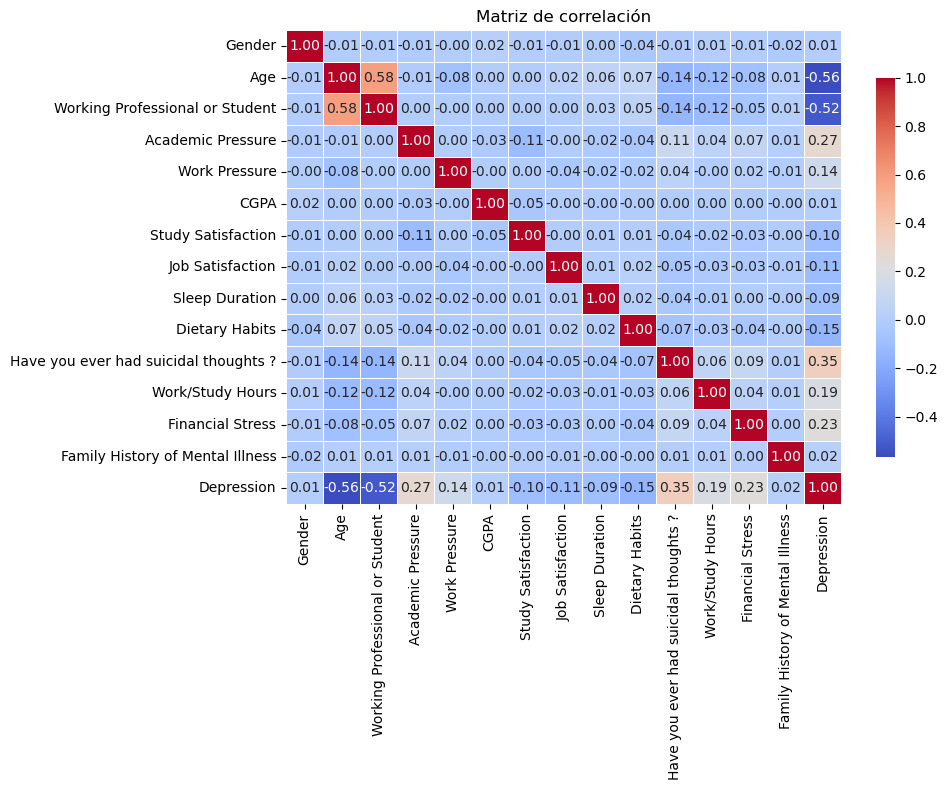

In [449]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# grafico
plt.tight_layout()
plt.show()

Se observan correlaciones entre las variables, sin embargo, las mismas no son correlaciones muy fuertes, en particular esto sugiere que las relaciones entre las variables no se comportan de manera lineal. Una de las correlaciones a destacar es la de la working professional or student con la edad y la de tener pensamientos suicidas con la depresion.

### **3. Preprocesamiento de los datos**

El objetivo de aplicar distintos modelos a este set de datos es el de predecir si la persona tiene o no depresión.

Se realiza el preprocesamiento de los datos para luego ser utilizados en modelos.

In [516]:
#df
df.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [517]:
# df
df.head(5).T

,0,1,2,3,4
Gender,0,1,1,1,0
Age,49.0,26.0,33.0,22.0,30.0
City,ludhiana,varanasi,visakhapatnam,mumbai,kanpur
Working Professional or Student,1,1,0,1,1
Profession,chef,teacher,other,teacher,business analyst
Academic Pressure,3.142273,3.142273,5.0,3.142273,3.142273
Work Pressure,5.0,4.0,2.998998,5.0,1.0
CGPA,7.658636,7.658636,8.97,7.658636,7.658636
Study Satisfaction,2.94494,2.94494,2.0,2.94494,2.94494
Job Satisfaction,2.0,3.0,2.974404,1.0,1.0


Se eligen como variable target a Depression y las demas columnas seran utlilizadas como predictoras.

In [518]:
# variables categoricas y target
x = df.drop(columns=['Depression'])  
y = df[['Depression']]

Se seleccionan las columnas numericas y categoricas.

In [519]:
# extraer columnas
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

# verificar
print("Features numericas: ", numerical_features)
print("Features categoricas: ", categorical_features)

Features numericas:  Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')
Features categoricas:  Index(['City', 'Profession', 'Degree'], dtype='object')


A pesar de que el dataset no contiene datos faltantes, igualmente se especifica en el pipeline un método de imputación a modo de que el código o el procedimiento sea escalable. Asi mismo, se opta por el SimpleImputer como método de imputación. 

Por otro lado, como las mayoría de los datos tienen distribución normal, se opta por el standardscaler para realizar los escalamientos.

In [520]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# categorico
categoric_transformer =  Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Se crea el columnTransformer para aplicarlo a los datos.

In [521]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),  
        ('cat', categoric_transformer, categorical_features)  
    ]
)

A pesar de que los datos vienen separados en train.csv y test.csv, los datos de test.csv no contienen a la columna de depresion. Dada esta condición y como no se puede testear sobre datos que no se conoce su respuesta, se utilizará el train.csv para realizar el entrenamiento y las predicciones de test.

Se separan los datos en 70% de entrenamiento y 30% para test.

In [522]:
# split del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [523]:
# verificacion 
print("Variables predictoras dimensiones en train" , x_train.shape)
print("Variable target dimensiones en train" , y_train.shape)

print("Variables predictoras dimensiones en test" , x_test.shape)
print("Variable target dimensiones en test" , y_test.shape)

Variables predictoras dimensiones en train (98490, 17)
Variable target dimensiones en train (98490, 1)
Variables predictoras dimensiones en test (42210, 17)
Variable target dimensiones en test (42210, 1)


### **4. Aplicación de modelos**

### **Modelo Random Forest Classifier**

Se aplica el modelo random forest classifier para el diagnostico de depresion. Los parametros seleccionados son: como criterio se seleccionó "gini", el número de estimadores será 100 y la profundidad máxima de cada árbol será 15.

In [524]:
# pipeline 
model_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', RandomForestClassifier(
    criterion="gini",
    n_estimators=100,
    max_depth=15,
    random_state=42
)
)])

In [525]:
# ajustar a los datos 
model_forest.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Profession', 'Degree'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, random_state=42))])

In [526]:
# realizar predicciones
y_pred = model_forest.predict(x_test)

In [527]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9341388296612178
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     34434
           1       0.85      0.78      0.81      7776

    accuracy                           0.93     42210
   macro avg       0.90      0.88      0.89     42210
weighted avg       0.93      0.93      0.93     42210



In [528]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[33346  1088]
 [ 1692  6084]]


In [529]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

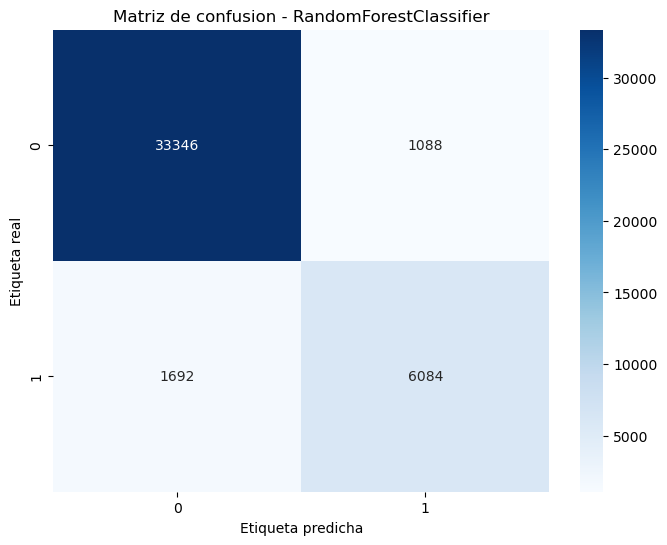

In [530]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - RandomForestClassifier")

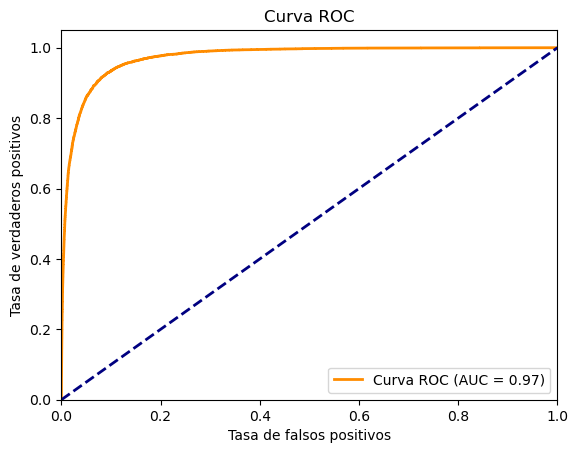

In [531]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_forest.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Los resultados utilizando random forest classifier con los parámetros mencionados anteriormente, son bastante buenos. El modelo realiza buenas predicciones para el diagnóstico de depresión. En particular, tiene una exactitud de 0.93. La matriz de confusión muestra que realiza buenas clasificaciones, ya que un total de aproximadamente 80.000 datos fueron predichos correctamente. Por otro lado, la curva roc arroja un valor de 0.97, lo cual es un desempeño bastante bueno.

### **Modelo XGBoost**

Se aplica el modelo xgboost classifier para el diagnostico de depresión. La métrica de evaluación seleccionada es el auc, la profundidad máxima será de 4, los estimadores serán 200 y la tasa de aprendizaje será 0.1.

In [532]:
# pipeline 
model_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', xgb.XGBClassifier(eval_metric="auc",           
    max_depth=4,                 
    n_estimators=200,            
    learning_rate=0.1) 
)])

In [533]:
# ajustar a los datos
model_xgboost.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/S...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [471]:
# realizar predicciones
y_pred = model_xgboost.predict(x_test)

In [472]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9384269130537787
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     34434
           1       0.84      0.82      0.83      7776

    accuracy                           0.94     42210
   macro avg       0.90      0.89      0.90     42210
weighted avg       0.94      0.94      0.94     42210



In [473]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[33234  1200]
 [ 1399  6377]]


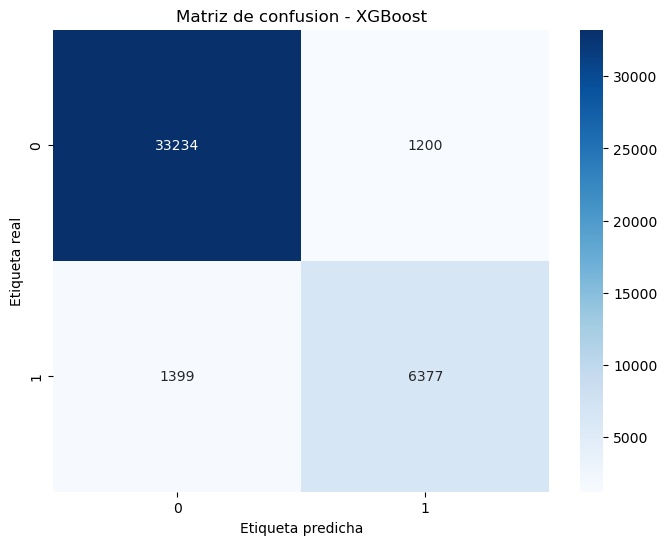

In [474]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - XGBoost")

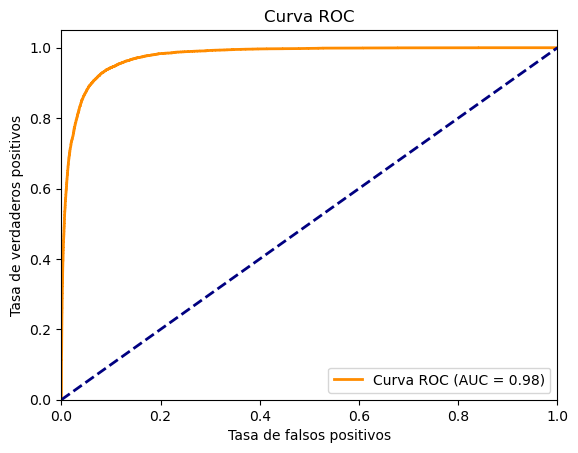

In [475]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_xgboost.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo XGBoost tiene un rendimiento menor al de Random Forest Classifier, con una exactitud de 0.93, sin embargo, es un muy buen modelo. Dentro de todo, realiza buenas predicciones, ya que la matriz de confusión muestra que 39.000 valores fueron etiquetados correctamente. En cuanto a la curva roc muestra un 98% de probablidades de predecir correctamente.

A continuación, se busca optimizar el modelo XGBoost usando GridSearchCV

In [480]:
# hiperparametros a probar
param_grid = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],    
    "classifier__max_depth": [3, 4, 5],                  
    "classifier__n_estimators": [25, 50, 100],        
    "classifier__subsample": [0.8, 1.0],               
    "classifier__colsample_bytree": [0.8, 1.0]          
}

In [481]:
# GridSearchCV
grid_search = GridSearchCV(
    model_xgboost, 
    param_grid,  
    cv=5,  
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1  
)

In [482]:
# buscar en train
grid_search.fit(x_train, y_train.values.flatten())

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever h...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [25, 50, 100],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [483]:
# resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R² en validación cruzada:", grid_search.best_score_)

Mejores parámetros: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Mejor R² en validación cruzada: 0.9389988831353436


In [484]:
# modelo ajustado
best_xgboost_model = grid_search.best_estimator_

In [485]:
# realizar predicciones
y_pred = best_xgboost_model.predict(x_test)

In [486]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9376451077943615
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     34434
           1       0.84      0.82      0.83      7776

    accuracy                           0.94     42210
   macro avg       0.90      0.89      0.90     42210
weighted avg       0.94      0.94      0.94     42210



In [487]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[33221  1213]
 [ 1419  6357]]


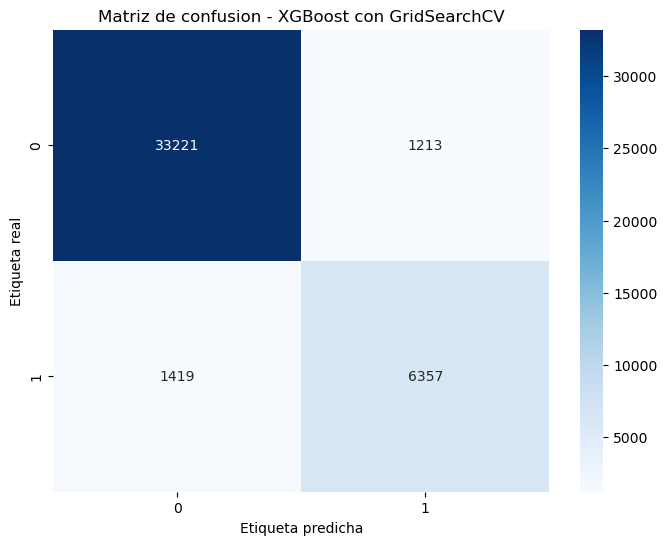

In [488]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - XGBoost con GridSearchCV")

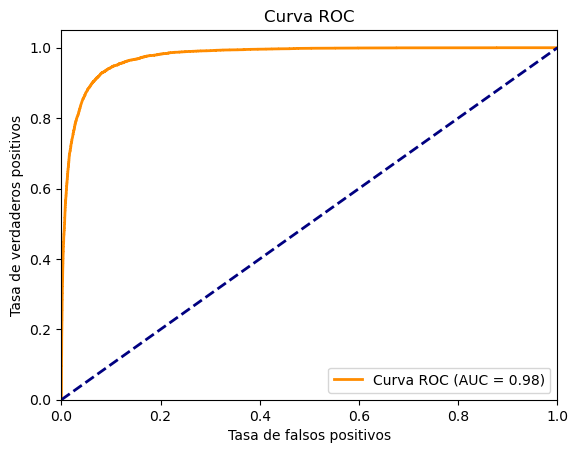

In [489]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, best_xgboost_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Aplicando GridSearchCV, el modelo de XGBoost mejoro muy poco. Configurando otros hiperparametros, el modelo puede mejorar mucho más, sin embargo el costo computacional es mayor ya que el dataset es bastante amplio.

### **Modelo Decission Tree Classifier**

Se aplica el modelo decission tree classifier para el diagnostico de depresión. 

In [490]:
# pipeline 
model_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', DecisionTreeClassifier( 
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5  
))])

In [491]:
# ajustar a los datos 
model_tree.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/S...ours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Profession', 'Degree'], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10))])

In [492]:
# realizar predicciones
y_pred = model_tree.predict(x_test)

In [493]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9250177683013504
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     34434
           1       0.80      0.79      0.80      7776

    accuracy                           0.93     42210
   macro avg       0.88      0.87      0.87     42210
weighted avg       0.92      0.93      0.92     42210



In [494]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[32903  1531]
 [ 1634  6142]]


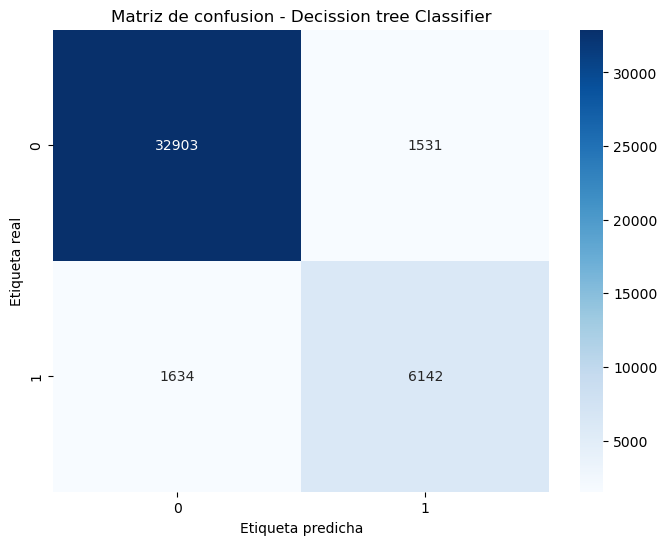

In [495]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission tree Classifier")

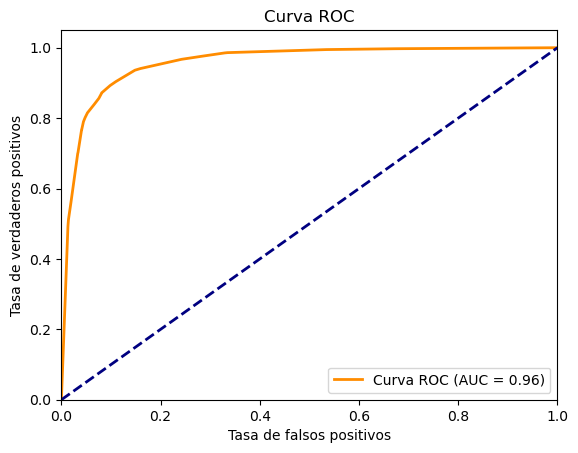

In [497]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_tree.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo Decission Tree classifer muestra un rendimiento menor al de random forest y xgboost. Tiene una exactitud del 0.92, la matriz de confusion muestra que las etiquetas clasificadas correctamente fueron 39.000 y la curva roc muestra un 96% de probabilidad de realizar una predicción correcta.

### **Modelo de Regresión Logística**

Se aplica el modelo regresion logistica para el diagnostico de depresión. 

In [498]:
# pipeline 
model_rlogistic = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

In [499]:
# ajustar a los datos
model_rlogistic.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Profession', 'Degree'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [500]:
# realizar predicciones
y_pred = model_rlogistic.predict(x_test)

In [501]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.936697465055674
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     34434
           1       0.84      0.81      0.83      7776

    accuracy                           0.94     42210
   macro avg       0.90      0.89      0.89     42210
weighted avg       0.94      0.94      0.94     42210



In [502]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[33237  1197]
 [ 1475  6301]]


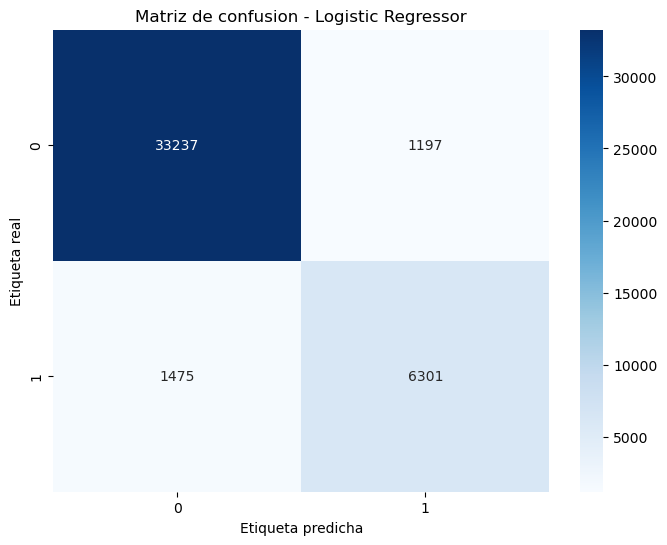

In [503]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Logistic Regressor")

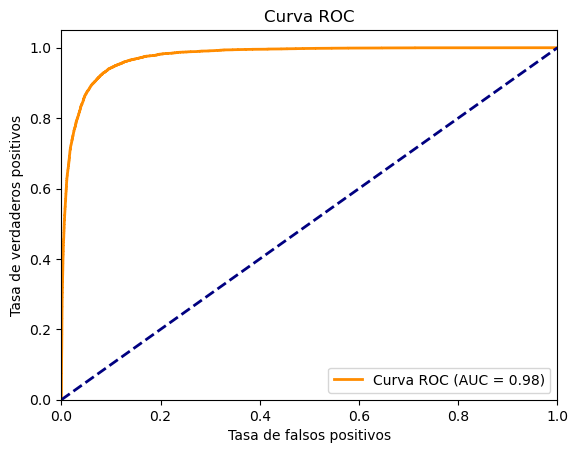

In [504]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_rlogistic.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo de regresion logística muestra una exactitud de 0.93, con 39.500 etiquetas predichas correctamente y auc de 0.98. 

### **Modelo LGBM Classifier**

Se aplica el modelo LGBM classifier para el diagnostico de depresión.

In [509]:
# pipeline 
model_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LGBMClassifier())  
])

In [510]:
# ajustar a los datos 
model_lgbm.fit(x_train, y_train.values.flatten())

c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Profession', 'Degree'], dtype='object'))])),
                ('classifier', LGBMClassifier())])

In [511]:
# realizar predicciones
y_pred = model_lgbm.predict(x_test)

In [512]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9376214167258944
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     34434
           1       0.84      0.82      0.83      7776

    accuracy                           0.94     42210
   macro avg       0.90      0.89      0.90     42210
weighted avg       0.94      0.94      0.94     42210



In [513]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[33197  1237]
 [ 1396  6380]]


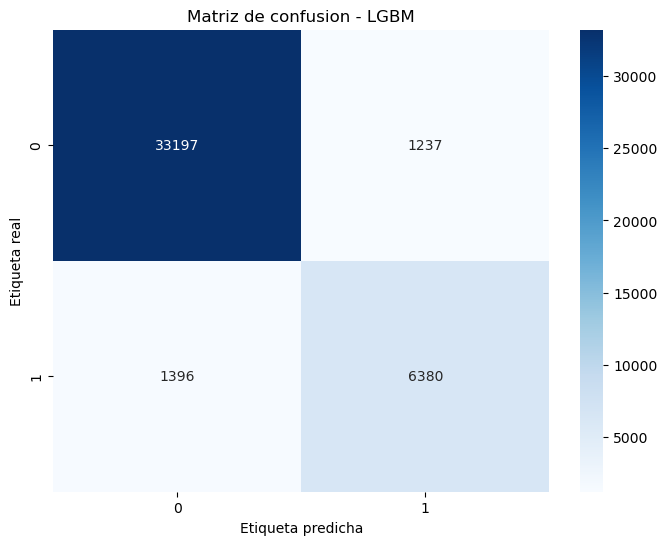

In [514]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - LGBM")

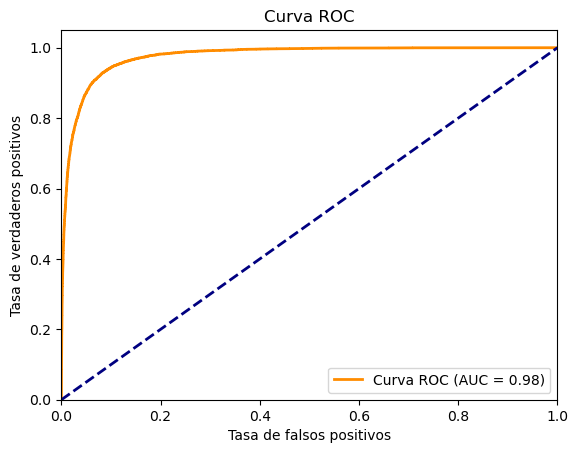

In [515]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_lgbm.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo LGBM tambien muestra una exactitud de 0.93, con 39.500 etiquetas predichas correctamente y auc de 0.98. 

En conclusión, el modelo con mejor predicción para este caso es random forest classfier, mientras que los demás pueden optimizarse con gridsearchcv o randomized cv.